# Interactive Jupyter notebooks
* Let you create simple and interactive graphics
* Use with caution, they're virtually useless outside of Jupyter.  Not great for command line or headless programs.

In [2]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets


def f(x):
    return x

interact(f, x=widgets.IntSlider(min=-10,max=30,step=1,value=10));

17

## Using interact() to get an interactive plot.  It's a bit slow here, but should be fast when running Jupyter on your local machine

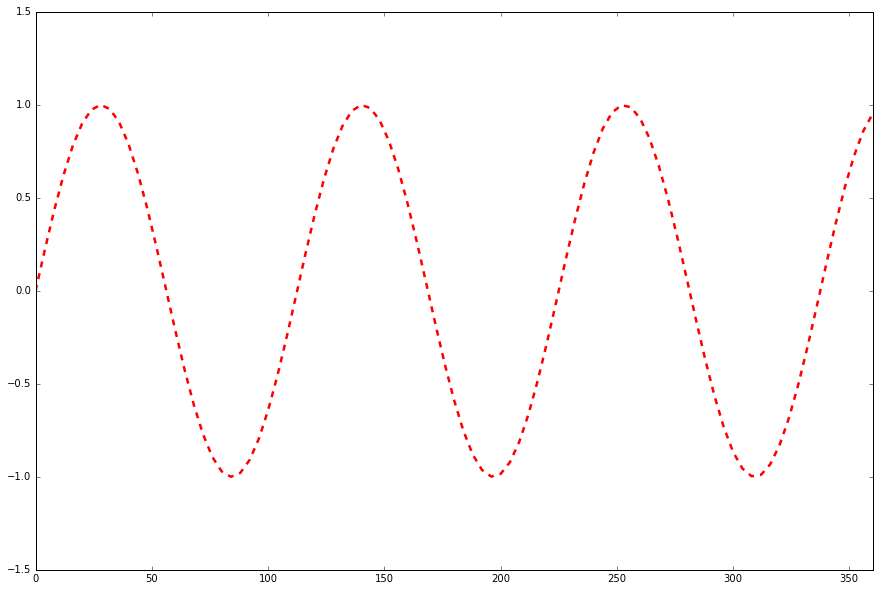

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams; rcParams['figure.figsize'] = (15.0, 10.0)

def sinewave(freq=1.0):
    x = np.linspace(0., 360., 91, endpoint=True)  # Generate uniformly spaced 1-d array
    y = np.sin(freq*x*np.pi/180.)                      # Compute sin(x)
    plt.plot(x, y, "--r", linewidth=2.5)

    plt.xlim(0, 360.)      # Set X-axis limits
    plt.ylim(-1.5, 1.5)    # Set Y-axis limits

interact(sinewave, freq=(0.0, 4.0))

## Lets bring an old demo back using these tricks, the quakesearch demo.
* use sliders for min/max magnitude.  Start/end dates would be more work (custom widgets).
* the slow plotting operation makes for sluggish response.  There are much faster alternatives to matplotlib/Basemap.

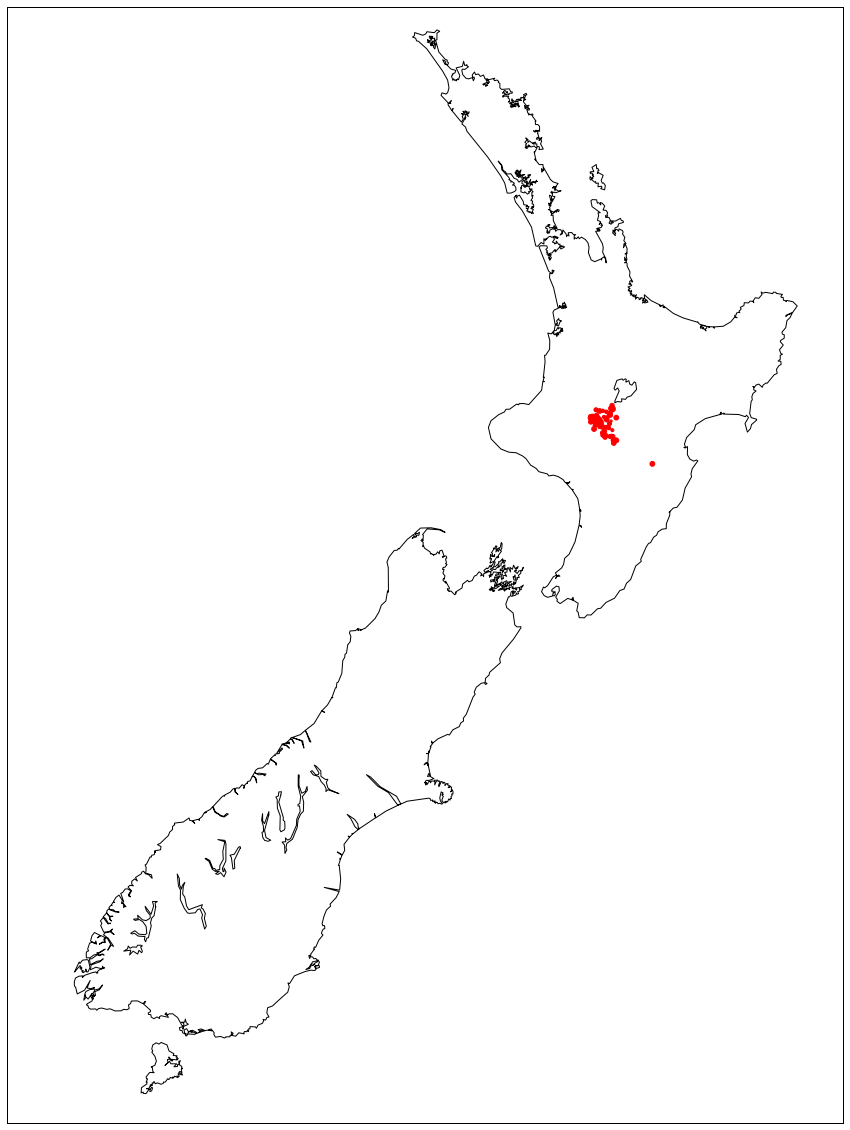

In [21]:
from __future__ import print_function
import requests
import json
from datetime import datetime
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from matplotlib import rcParams
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

def quakes(params, url='http://quakesearch.geonet.org.nz/services/1.0.0/geojson'):

    r = requests.get(url, params=params)
    r.raise_for_status()

    return r.json()

def display_map(quakedata):
    # set fig size for Jupyter notebook
    rcParams['figure.figsize'] = (40.0, 20.0)
    
    # setup Lambert Conformal basemap.
    m = Basemap(projection='lcc',
                resolution='i',
                lat_0=-41., lon_0=174.,
                llcrnrlon=165., llcrnrlat=-47.5,
                urcrnrlon=179., urcrnrlat=-34.)

    # unfortunately this is a slow operation
    m.drawcoastlines()
    
    # draw all earthquakes, size of circle corresponds to magnitude of quake
    quake_lats = []
    quake_lons = []
    quake_mags = []
    for feature in quakedata['features']:
        #print(feature['properties']['publicid'], feature['geometry']['coordinates'])
        # we want to plot a point for latitude and longitude which are in the properties dict
        properties = feature['properties']
        quake_lats.append(float(properties['latitude']))
        quake_lons.append(float(properties['longitude']))
        quake_mags.append(float(properties['magnitude'])*40)

    x, y = m(quake_lons, quake_lats)
    m.scatter(x, y, quake_mags, marker='o', color='r')
    plt.show()

def plot_quake(minmag=0, maxmag=10, mindepth=0, maxdepth=500):

    # construct params.
    # All options: [GET] /csv?bbox=(bbox)&minmag=(minmag)&maxmag=(maxmag)&mindepth=(mindepth)&maxdepth=(maxdepth)&startdate=(startdate)&enddate=(enddate)
    params = {'bbox': [165.0, -47.5, 179.0, -34.0],
              'startdate': datetime(2016, 1, 1, 0, 0, 0),
              'enddate': datetime(2016, 4, 8, 15, 0, 0),
              'minmag':minmag,
              'maxmag':maxmag,
              'mindepth':mindepth,
              'maxdepth':maxdepth}

    # get the data from the REST API
    quakedata = quakes(params)

    # iterate over the data (a pretty complex dict)
    #for feature in quakedata['features']:
    #    print(feature['properties']['publicid'], feature['geometry']['coordinates'])

    display_map(quakedata)

interact(plot_quake, minmag=(0.0,10.0), maxmag=(0.0,10.0), mindepth=(0, 500), maxdepth=(0,500));
